In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt

In [3]:
info = pd.read_csv('all_data.csv')
print(info.head(5))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


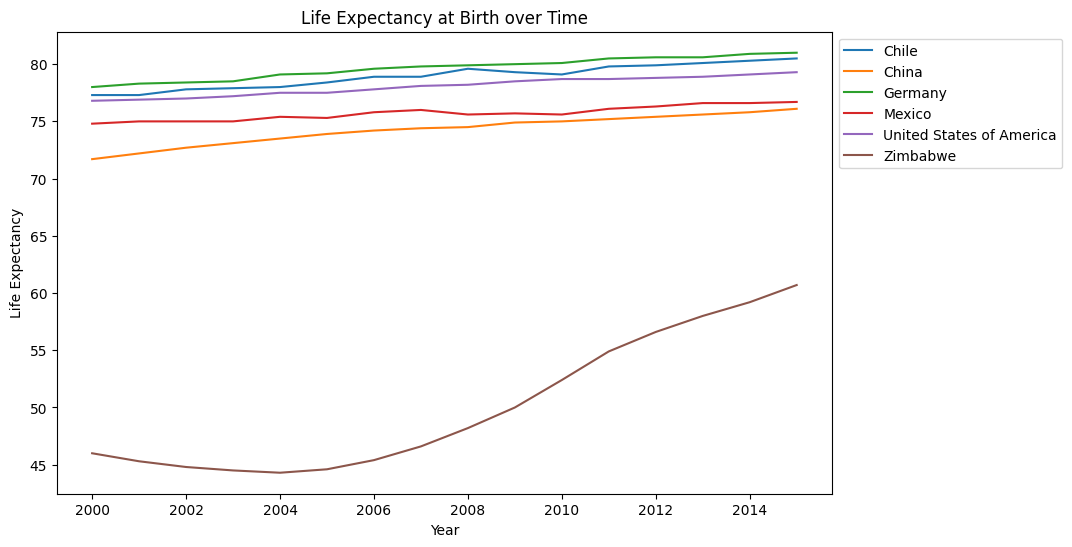

<Figure size 640x480 with 0 Axes>

In [4]:
# Get countries
countries = info['Country'].unique()

plt.figure(figsize=(10, 6))

for country in countries:
    countryData = info[info['Country'] == country]
    plt.plot(countryData['Year'], countryData['Life expectancy at birth (years)'], label=country)

plt.title('Life Expectancy at Birth over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

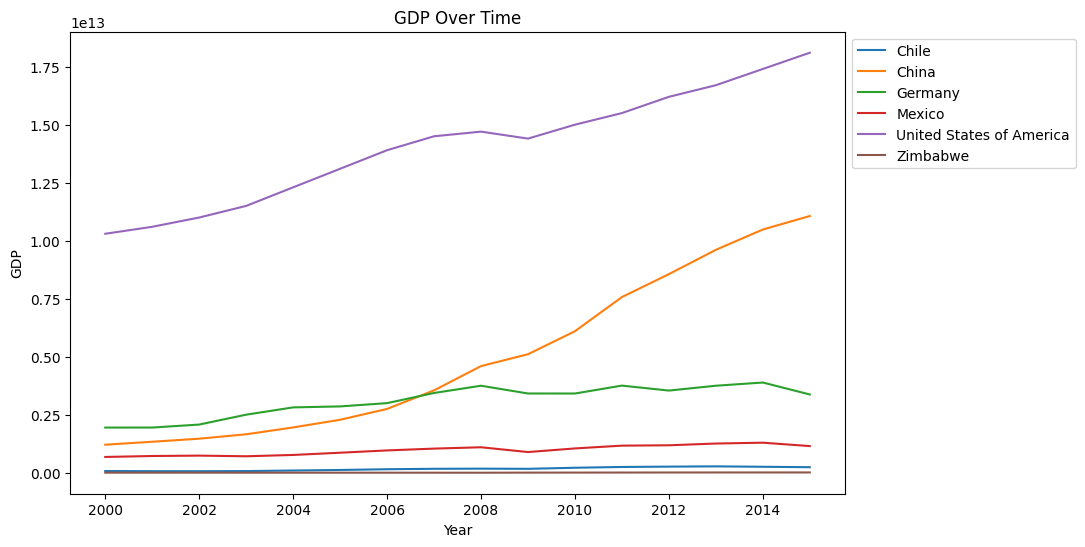

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(10, 6))
for country in countries:
    countryData = info[info['Country'] == country]
    plt.plot(countryData['Year'], countryData['GDP'], label=country)

plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()
plt.clf()

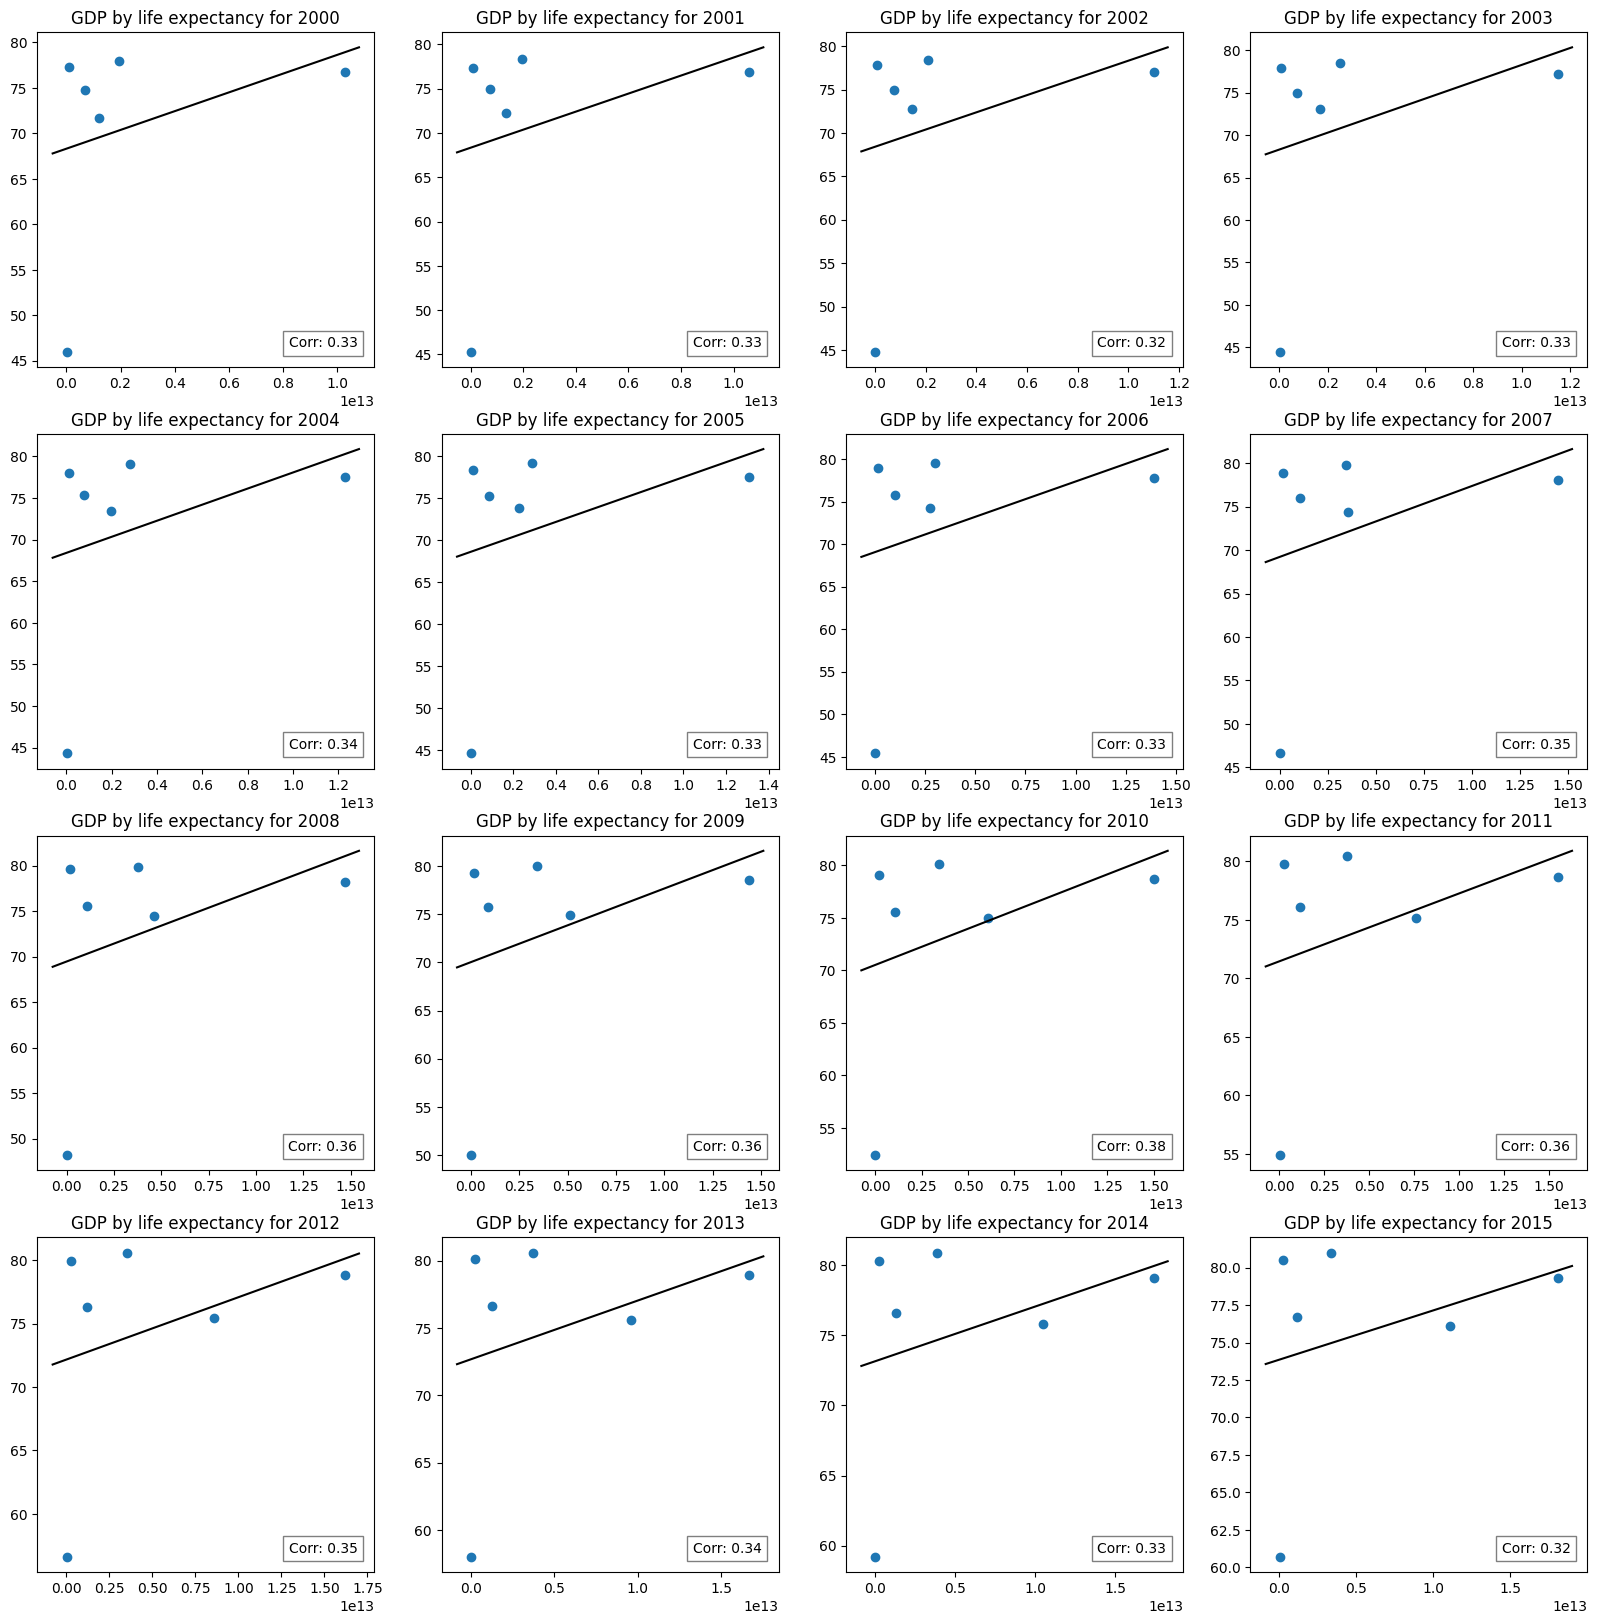

<Figure size 640x480 with 0 Axes>

In [19]:
years = info['Year'].unique()
fig, axis = plt.subplots(4, 4, figsize=(20, 20))
x = 0
y = 0
for year in years:
    yearData = info[info['Year'] == year]
    axis[x, y].scatter(yearData['GDP'], yearData['Life expectancy at birth (years)'])

    slope, intercept = np.polyfit(yearData['GDP'], yearData['Life expectancy at birth (years)'], 1)
    x_values = np.array(axis[x, y].get_xlim())
    y_values = slope * x_values + intercept

    axis[x, y].plot(x_values, y_values, color='black')
    axis[x, y].set_title('GDP by life expectancy for ' + str(year))

    corr_coef = np.corrcoef(yearData['GDP'], yearData['Life expectancy at birth (years)'])[0, 1]
    axis[x, y].text(0.95, 0.05, f'Corr: {corr_coef:.2f}',
                    transform=axis[x, y].transAxes, horizontalalignment='right',
                    verticalalignment='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    
    if y < 3:
        y += 1
    else:
        y = 0
        x += 1

plt.show()
plt.clf()